In [11]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt

# Objective function
def f(x):
    return  x[0]**2 - x[0] * x[1] + x[1]**2 + 9 * x[0] - 6 * x[1] + 20
# Derivative
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2 * x[1] - 6])

def log(arr):
    
    logger = []
    
    for i in range(len(arr)):
        logger.append(arr[i])
    return logger

def bfgs_method(f, fprime, x0, epsi, maxiter = None):

    if maxiter is None:
        maxiter = len(x0) * 200
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    
    global x_current
    x_current = []

    I = np.eye(N, dtype = int)
    Hk = I
    xk = x0
    
    x_current.append(log(xk))
    
    while ln.norm(gfk) > epsi and k < maxiter:
        pk = -np.dot(Hk, gfk)
        line_search = sp.optimize.line_search(f, f1, xk, pk)
        alpha_k = line_search[0]
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        x_current.append(log(xk))
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] *
                                                 sk[np.newaxis, :])
        
    return (xk, k)

result, k = bfgs_method(f, f1, np.array([1.00, 1.00]), 10e-3)
print('argmin: %s' % (result))
print('Iteration Count: %s' % (k))

argmin: [-4.  1.]
Iteration Count: 3


# N(e)

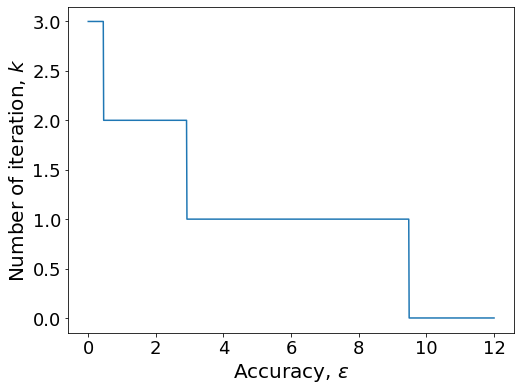

In [13]:
plt.figure(figsize = (8, 6))
NumPoints = 1000
epsimin = 1e-3
epsimax = 12
depsi = (epsimax - epsimin) / (NumPoints - 1)
xvals = [0.0] * NumPoints
yvals = np.zeros(NumPoints)
for i in range(NumPoints):
    xvals[i] = epsimin + i * depsi
    result, k = bfgs_method(f, f1, np.array([1,2]), epsimin + i * depsi)
    yvals[i] = k
plt.plot(xvals,yvals)
plt.xlabel(r"Accuracy, $\epsilon$", fontsize = 20)
plt.ylabel("Number of iteration, $k$", fontsize = 20)
plt.xticks(fontsize = 18)
_ = plt.yticks(fontsize = 18)

# $\|x^k-x^*\|(k)$

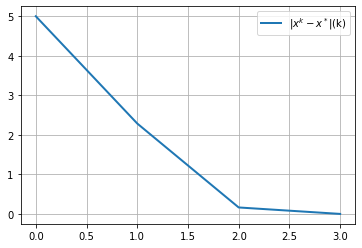

In [12]:
string = '|x^k-x^*|(k) for  f'# f(x), $\|x^k-x^*\|(k)$
xlab = 'k'   
ylab = '$\|x^k-x^*\|$'
x_k, N = bfgs_method(f, f1, np.array([1.00, 1.00]), 10e-3)
k = [i for i in range(N + 1)]
norma_x = [np.linalg.norm(x_current[i] - x_k) for i in range(len(x_current))]
plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')
plt.legend(loc = 'best')
plt.grid()
plt.show()

# $\|f(x^k)-f(x^*)\|(k)$

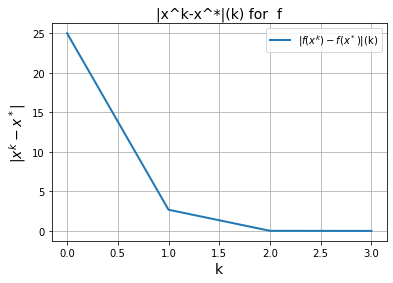

In [17]:
x_k, N =  bfgs_method(f, f1, np.array([1.00, 1.00]), 10e-3)
k = [i for i in range(N + 1)]
norma_x = [f(x_current[i]) - f(x_k) for i in range(len(x_current))]
    
plt.plot(k, norma_x, linewidth = 2, label = '$|f(x^k)-f(x^*)|$' + '('+'k' +')')
        
plt.title(string, size = 14)
plt.xlabel(xlab, size = 14)
plt.ylabel(ylab, size = 14)

plt.legend(loc = 'best')
plt.grid()
plt.show()